In [4]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import time
import re
import os
import json
import re
from IPython.display import display, Image

In [11]:
# in this tutorial, I will show you how to web-scrap the search results of 'samsung tv' on eBay

# first find the url of the website that you want to scrap
url = 'https://www.ebay.com/sch/i.html?_from=R40&_trksid=m570.l1313&_nkw=samsung+tv&_sacat=0'

In [13]:
### define a function to scrape the result page with beautifulsoup and store it as soup object
def web_scraping(url): 
    agent = {"User-Agent":"Mozilla/5.0"}
    source=requests.get(url, headers=agent).content
    soup = BeautifulSoup(source, 'html.parser')    
    return soup

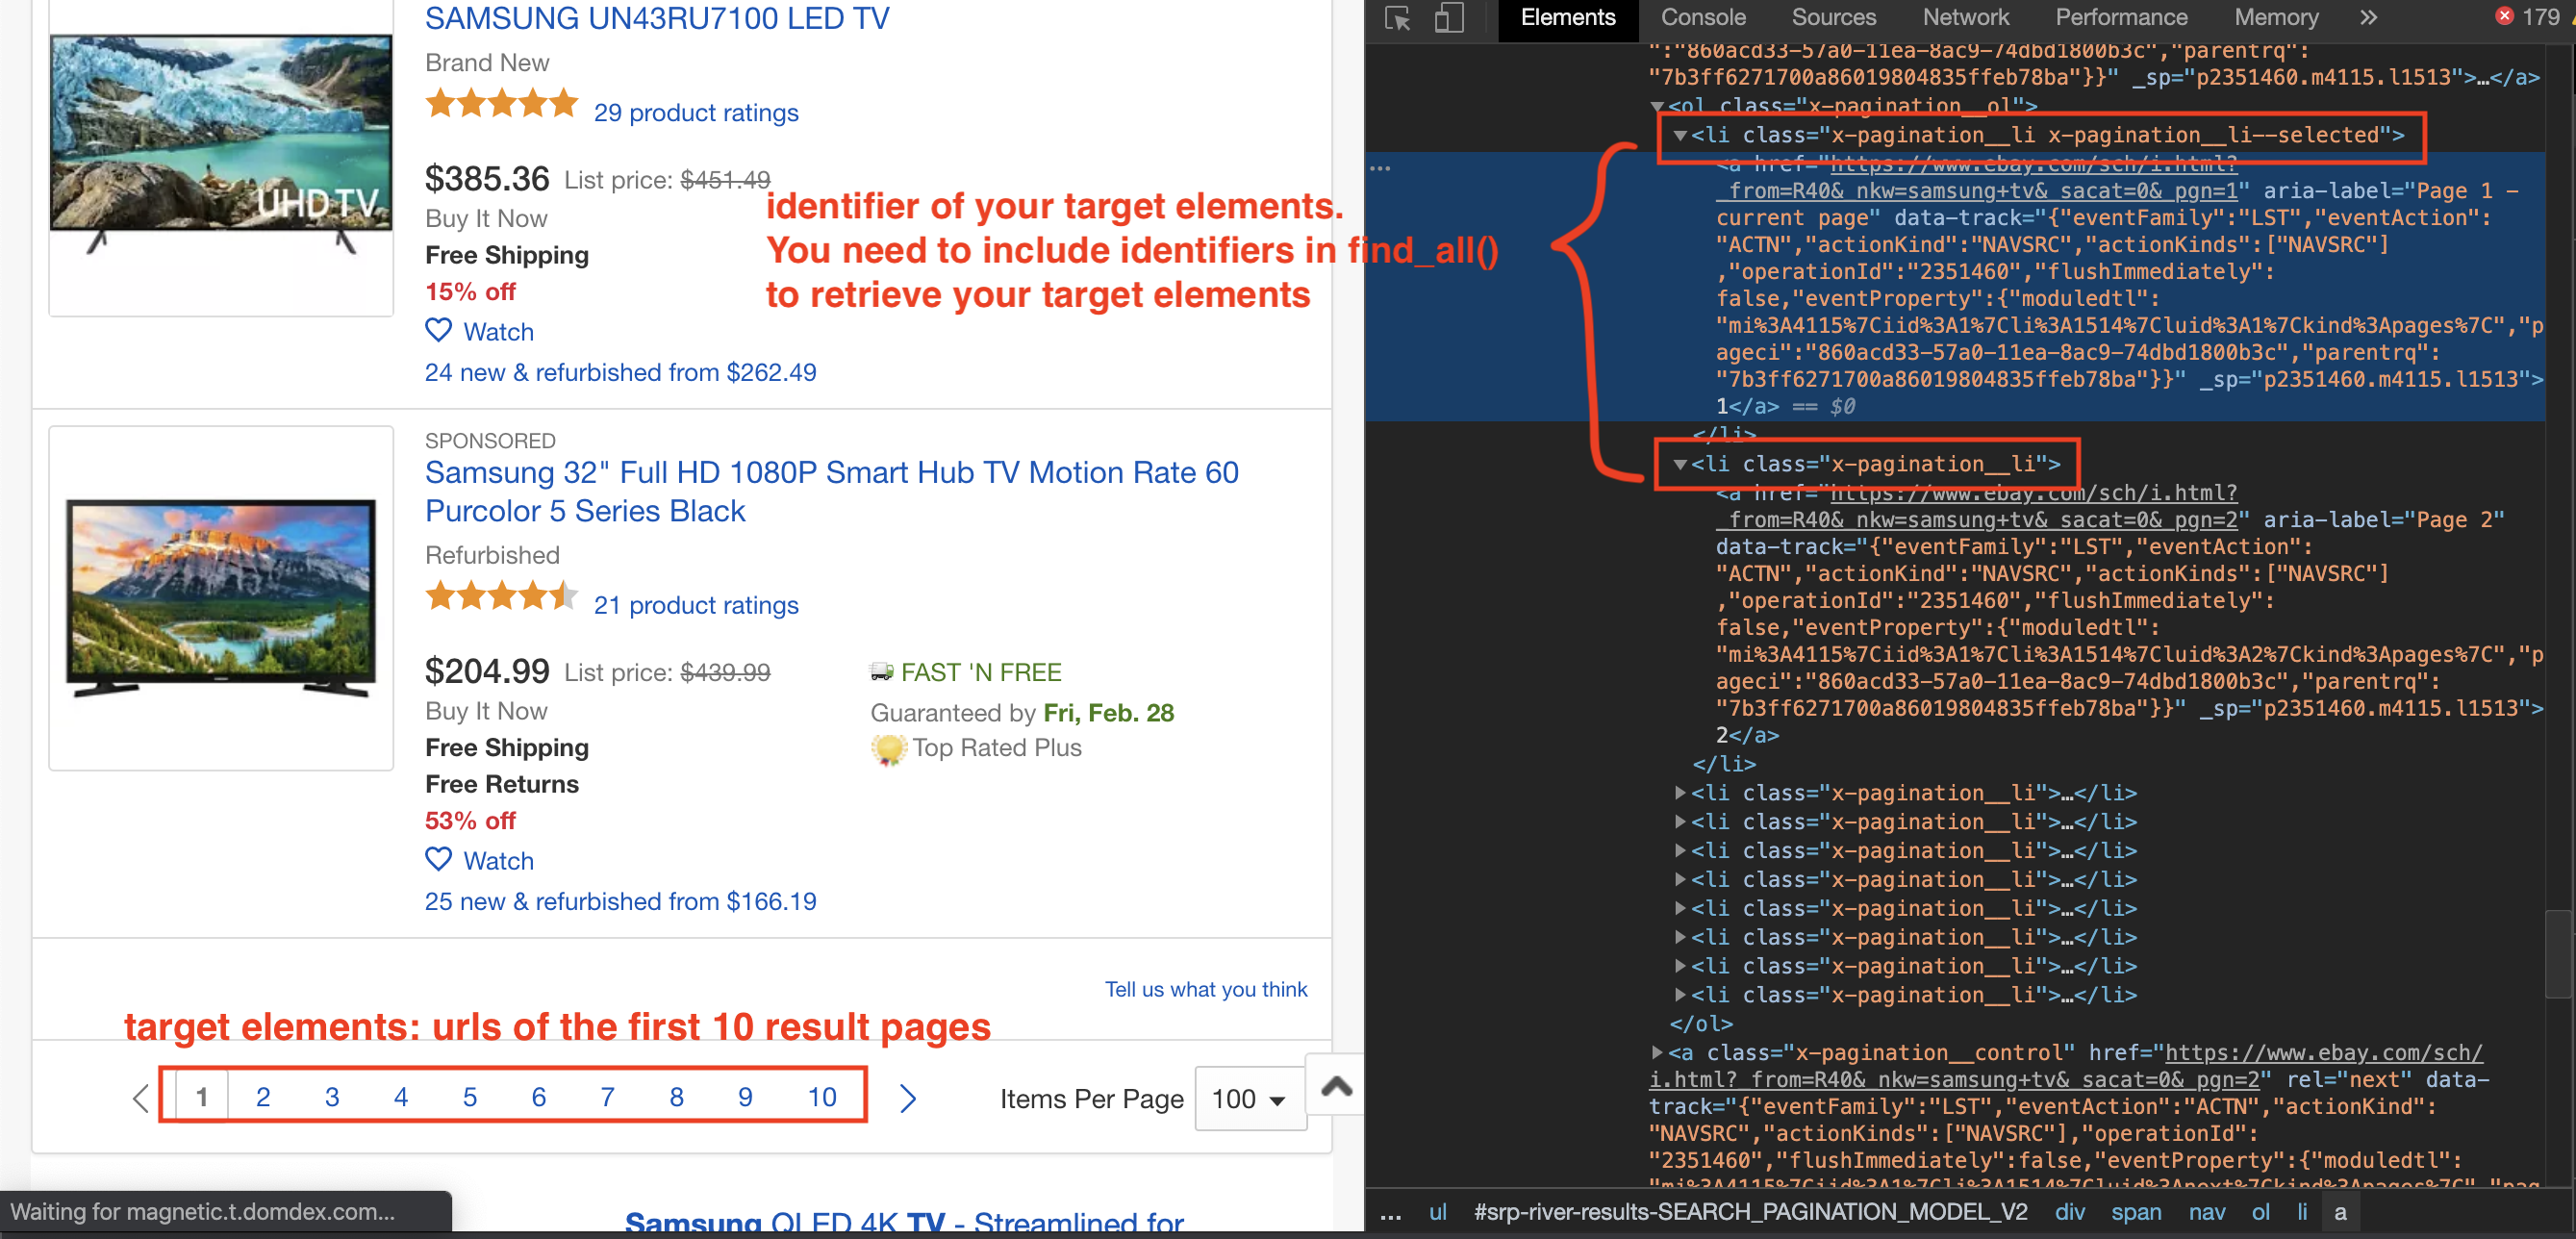

In [14]:
### to see the structure of the web page(the right part of the image shown below), 
### if you use google Chrome, you should right click the page and click on 'inspect'
display(Image(filename='web_scraping.png'))

In [15]:
### define a function to download the first 10 result pages
### note that everytime you want to do web scarping, you might want to download the target pages as "html" files
### and store them in local files, because the web page structures can be changing anytime 
def download_page_results(url):

### call the web_scraping function
    soup = web_scraping(url)

### use find_all the retrieve the urls of the first 10 pages and store them into a list
    url_list = [page.a.get('href') for page in soup.find_all('li', class_=('x-pagination__li x-pagination__li--selected',
                                                                           'x-pagination__li'))]  
    
### download the first 10 result pages and save them to local files
    for i, link in enumerate(url_list):
        i = str(i+1)
        with open(f'./samsung'+f'0'*(2-len(i))+f'{i}.htm', 'w',encoding='UTF-8') as f:
            f.write(web_scraping(link).prettify())
            
### wait for 10 seconds between each page request
    time.sleep(10)

In [16]:
### call the function download_page_results
download_page_results(url)

In [17]:
### define a function to read all the 'htm' files from current path, convert them into Beautifulsoup objects and save them to soup_list
def read_htm_files(path):
    soup_list = []
    
### list out all paths of 'htm' files 
    files = os.listdir(path)
    for file in files:
        
### identify all 'htm' files from current path
        if file.endswith('.htm'):
            filePath = path + '/' + file
            
### open 'htm' files and save them as beautifulsoup objects, store them in soup_list
            with open(filePath) as fp: 
                contents = fp.read()
                soup = BeautifulSoup(contents, 'html.parser')
            soup_list.append(soup)
    return soup_list

In [18]:
# read all the htm file
soup_list = read_htm_files('./')

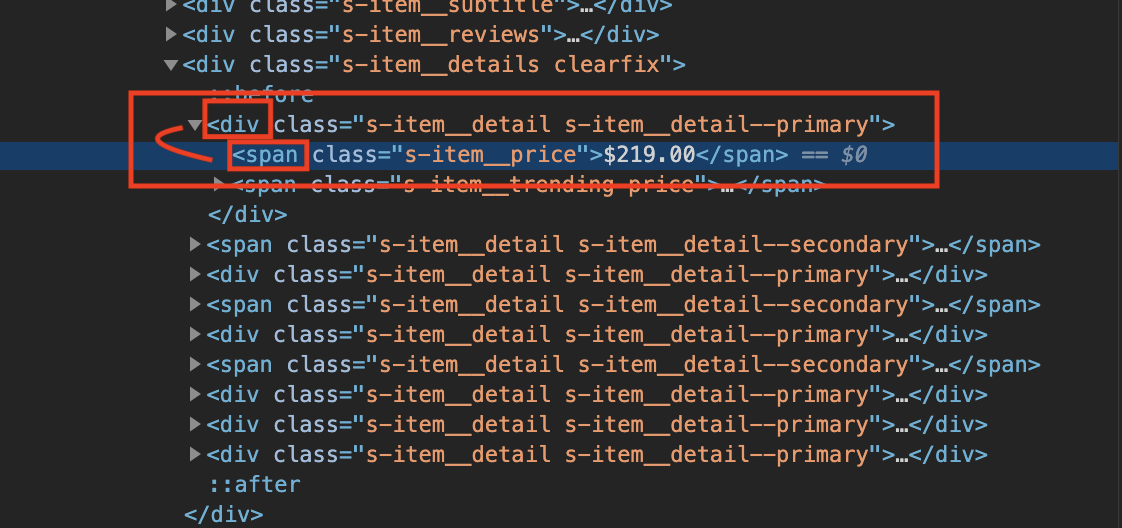

In [21]:
### suppose you want to scrap all the prices of the products in the first 10 pages
display(Image(filename='web_scraping_2.png'))

In [161]:
### suppose you want to scrap all the 'item titles' and 'prices' of the products in the first 10 pages
### retrieve the prices and store them into a list
price_list = []
for soup in soup_list:
        for span in soup.find_all('span', class_ = 's-item__price'):
            try:
                price = float(re.findall(r'[0-9.,]+',str(span.text))[0])
                price_list.append(price)
            except:
                price_list.append(None)
                continue

## Store Pricing Data Into MySQL Database

In [138]:
import mysql.connector

In [140]:
# connect to local database and create database eBay
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="" ### you need to input your password here 
)

mycursor = mydb.cursor()

mycursor.execute("CREATE DATABASE eBay")

In [144]:
# create table eBay_items with three columns 'title','currency' and 'price'
mycursor.execute("use eBay")
mycursor.execute('CREATE TABLE eBay_items (Itemid int NOT NULL AUTO_INCREMENT, item_price INT,PRIMARY KEY (Itemid))')

In [164]:
# insert items_info to table eBay
mycursor.execute("use eBay")
for i in price_list:
    sql = "INSERT INTO eBay_items (item_price) VALUES (%s)"
    val = i
    mycursor.execute(sql, (val,))

mydb.commit()

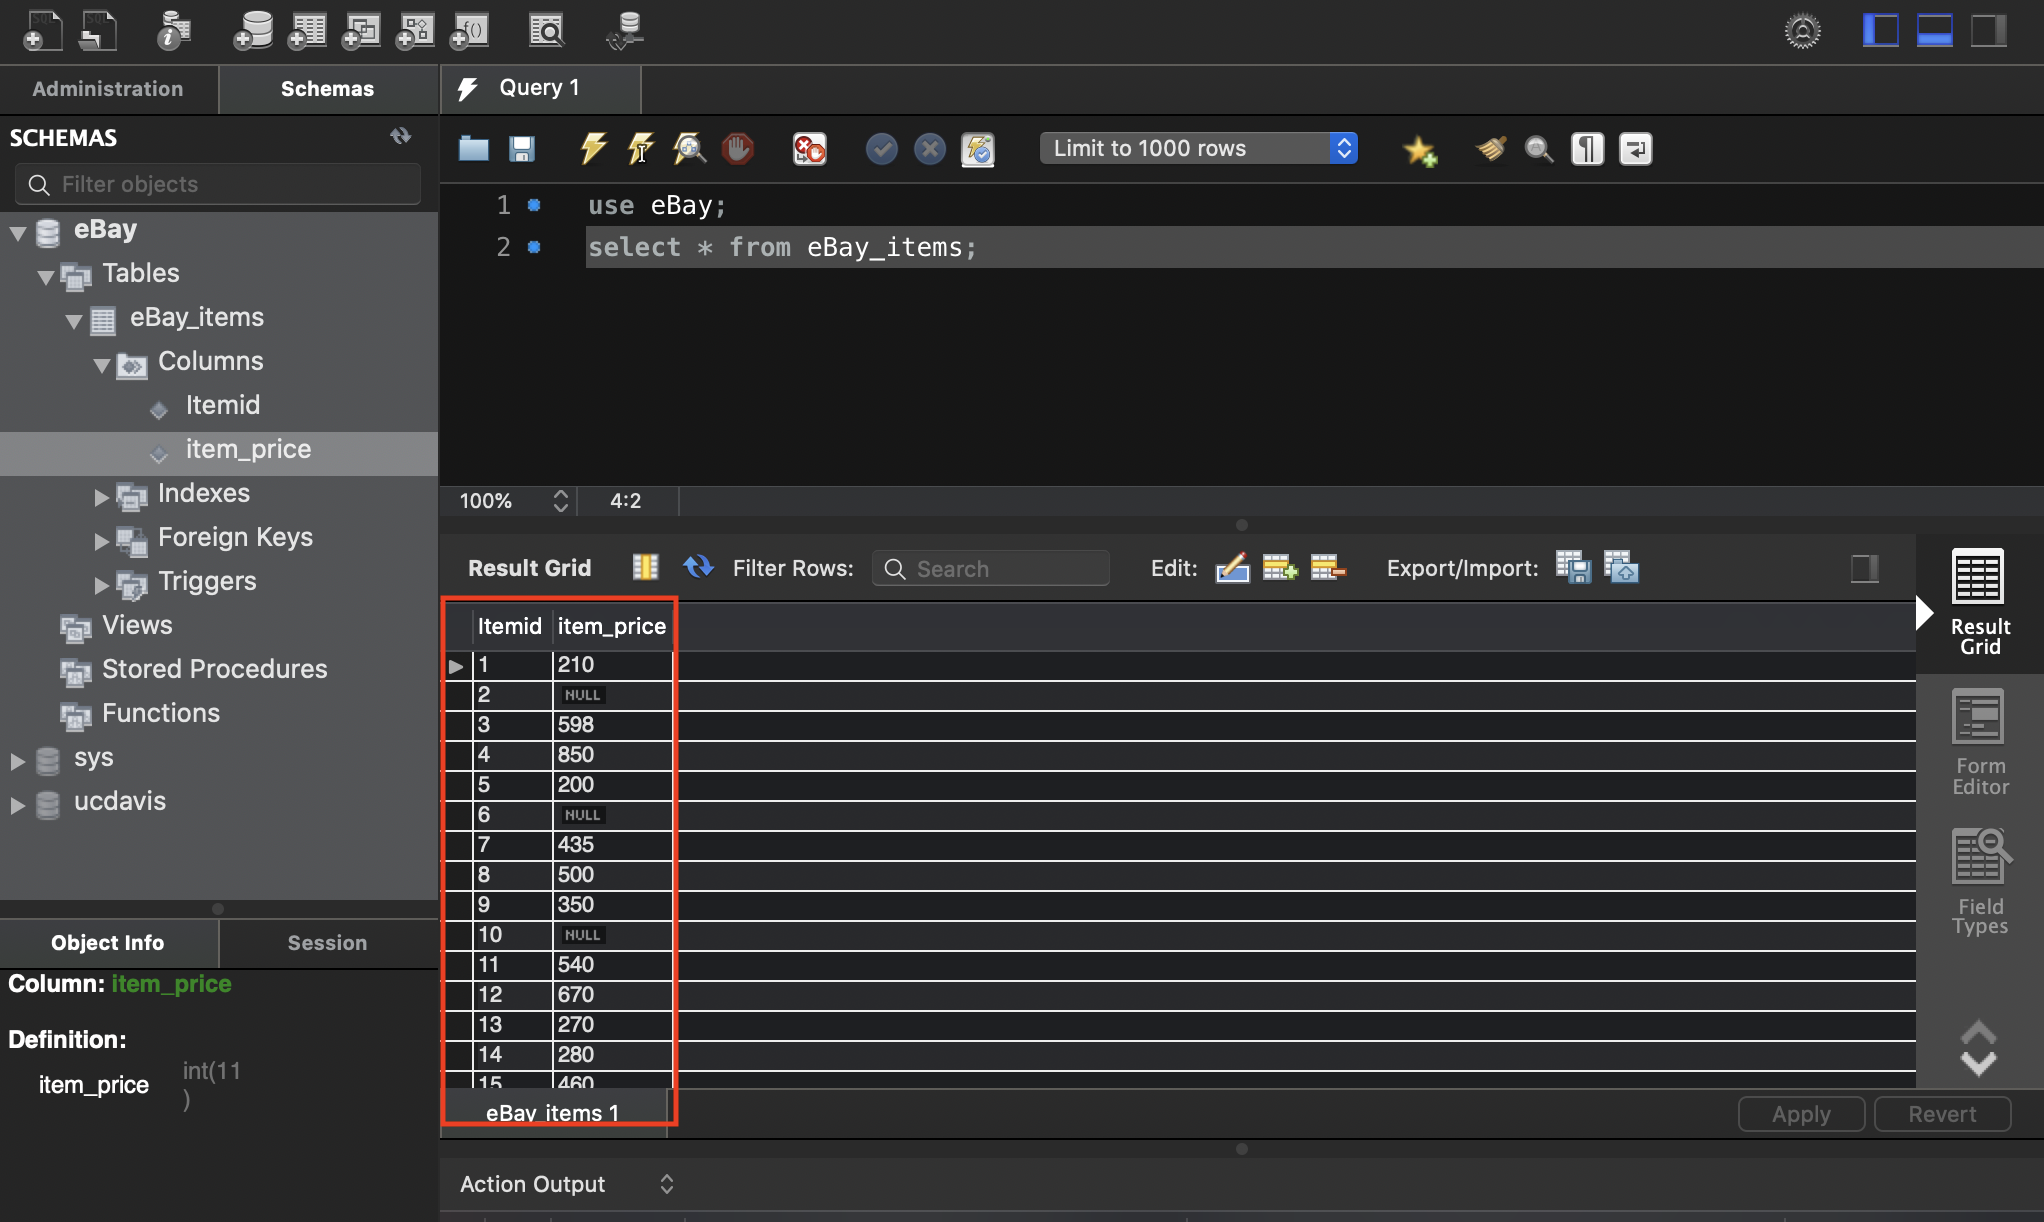

In [166]:
### Now you successfully store the pricing data in your local MySQL Database! Congratulations!
display(Image(filename='web_scraping_4.png'))